# Task 4
# To Develop a Hand Gesture Recognition Model
## By Adhikrit Gupta

Training directory contents: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']
Test directory contents: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']
Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.
Epoch 1/25
  3/500 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.0903 - loss: 12.4509

W0000 00:00:1717127440.376696     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4567 - loss: 3.0900

W0000 00:00:1717127502.715121     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 155ms/step - accuracy: 0.4571 - loss: 3.0874 - val_accuracy: 0.7448 - val_loss: 1.2926
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 154ms/step - accuracy: 0.8235 - loss: 1.0277 - val_accuracy: 0.8062 - val_loss: 1.0652
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 79s 157ms/step - accuracy: 0.8630 - loss: 0.8684 - val_accuracy: 0.8052 - val_loss: 0.9806
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 79s 156ms/step - accuracy: 0.8872 - loss: 0.7595 - val_accuracy: 0.8037 - val_loss: 1.0255
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step

W0000 00:00:1717128509.467151     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step


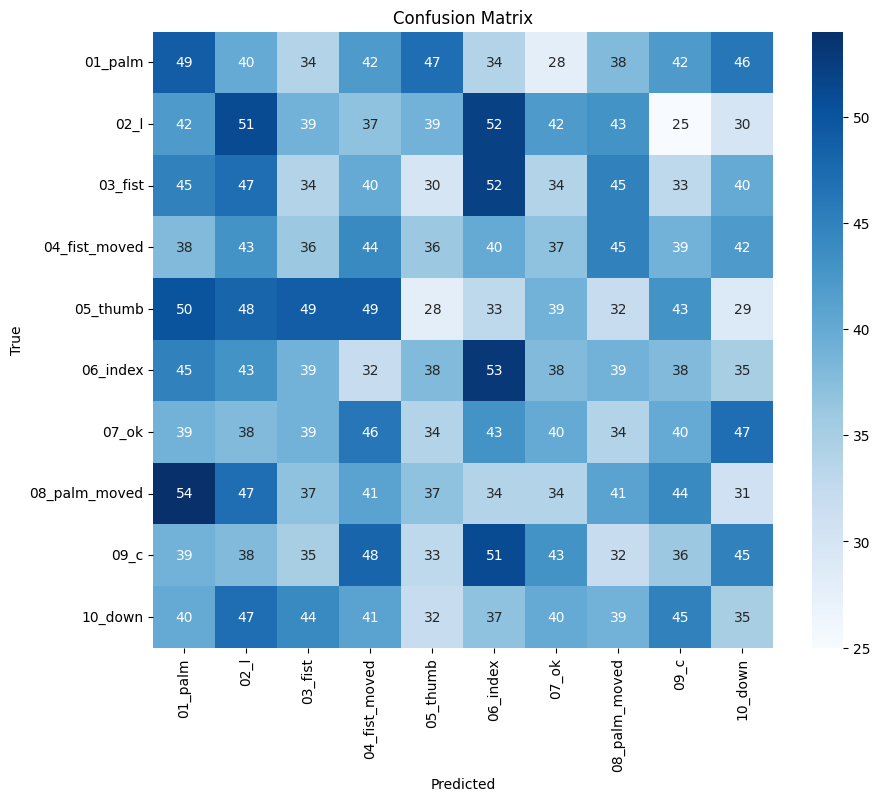

               precision    recall  f1-score   support

      01_palm       0.11      0.12      0.12       400
         02_l       0.12      0.13      0.12       400
      03_fist       0.09      0.09      0.09       400
04_fist_moved       0.10      0.11      0.11       400
     05_thumb       0.08      0.07      0.07       400
     06_index       0.12      0.13      0.13       400
        07_ok       0.11      0.10      0.10       400
08_palm_moved       0.11      0.10      0.10       400
         09_c       0.09      0.09      0.09       400
      10_down       0.09      0.09      0.09       400

     accuracy                           0.10      4000
    macro avg       0.10      0.10      0.10      4000
 weighted avg       0.10      0.10      0.10      4000

Found 20000 images belonging to 10 classes.
Test generator directory contents: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']
02_l contains 2000 images
04_fi

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.9568 - loss: 0.4660
Test Loss: 0.42645782232284546
Test Accuracy: 0.9659500122070312


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
dataset_path = '/kaggle/input/gesturerecog/leapGestRecog'
test_dataset_path = '/kaggle/input/gesturerecog/leapGestRecog'

# Image parameters
img_width, img_height = 64, 64
batch_size = 32

# Check and list directory contents
print("Training directory contents:", os.listdir(dataset_path))
print("Test directory contents:", os.listdir(test_dataset_path))

# Data augmentation and normalization for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    rotation_range=30,
    horizontal_flip=True,
    validation_split=0.2)  # 20% validation split

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Model definition with regularization
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=25)

# Save the trained model
model.save('hand_gesture_model.h5')

# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=validation_steps)
print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')

# Get true labels and predictions for the validation set
validation_generator.reset()
Y_pred = model.predict(validation_generator, validation_steps)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes[:len(y_pred)]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_labels = list(validation_generator.class_indices.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=cm_labels)
print(report)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Check and list test directory contents
print("Test generator directory contents:", os.listdir(test_dataset_path))
for class_name in os.listdir(test_dataset_path):
    class_path = os.path.join(test_dataset_path, class_name)
    if os.path.isdir(class_path):
        print(f"{class_name} contains {len(os.listdir(class_path))} images")

# Evaluate the model on the test set
test_steps = test_generator.samples // batch_size
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


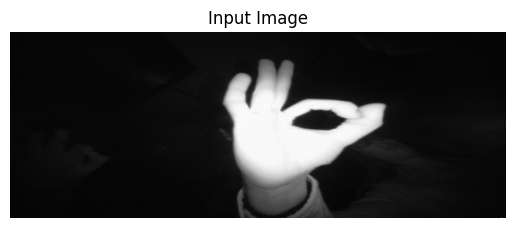

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Gesture: 07_ok with confidence 1.00


In [11]:
class_labels = list(train_generator.class_indices.keys())

def predict_gesture(image_path):
    # Load the original image
    original_img = load_img(image_path)
    plt.imshow(original_img)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Load and preprocess the image for prediction
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_class]
    confidence = predictions[0][predicted_class]

    print(f"Predicted Gesture: {predicted_label} with confidence {confidence:.2f}")
    
image_path = '/kaggle/input/gesturerecog/leapGestRecog/07_ok/frame_00_07_0007.png'  
predict_gesture(image_path)